In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import the sklearn libraries
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [2]:
data=pd.read_csv("indian_liver_patient.csv")
print (f"Total number of samples: {data.shape[0]}. Total number of features in each sample: {data.shape[1]} .")

#get the first five data 
data.head()

Total number of samples: 583. Total number of features in each sample: 11 .


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
data.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [5]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [6]:
data.shape

(583, 11)

In [7]:
data_duplicate = data[data.duplicated(keep = False)] 
# keep = False gives you all rows with duplicate entries
data_duplicate

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
18,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
19,40,Female,0.9,0.3,293,232,245,6.8,3.1,0.80,1
25,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
26,34,Male,4.1,2.0,289,875,731,5.0,2.7,1.10,1
33,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
34,38,Female,2.6,1.2,410,59,57,5.6,3.0,0.80,2
54,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
55,42,Male,8.9,4.5,272,31,61,5.8,2.0,0.50,1
61,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1
62,58,Male,1.0,0.5,158,37,43,7.2,3.6,1.00,1


In [8]:
data = data[~data.duplicated(subset = None, keep = 'first')]

data.shape

(570, 11)

In [9]:
data.isnull().values.any()

True

In [10]:
print(data.isnull().sum())

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64


In [11]:
print ("length before removing NaN values:%d"%len(data))
data_2 = data[pd.notnull(data['Albumin_and_Globulin_Ratio'])]
print ("length after removing NaN values:%d"%len(data_2))

length before removing NaN values:570
length after removing NaN values:566


In [12]:

new_data=data.dropna(axis = 0, how ='any')

In [13]:
new_data.isnull().values.any()

False

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 570 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         570 non-null    int64  
 1   Gender                      570 non-null    object 
 2   Total_Bilirubin             570 non-null    float64
 3   Direct_Bilirubin            570 non-null    float64
 4   Alkaline_Phosphotase        570 non-null    int64  
 5   Alamine_Aminotransferase    570 non-null    int64  
 6   Aspartate_Aminotransferase  570 non-null    int64  
 7   Total_Protiens              570 non-null    float64
 8   Albumin                     570 non-null    float64
 9   Albumin_and_Globulin_Ratio  566 non-null    float64
 10  Dataset                     570 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 53.4+ KB


In [15]:
le = preprocessing.LabelEncoder()
le.fit(['Male','Female'])
data.loc[:,'Gender'] = le.transform(data['Gender'])

#Remove rows with missing values
data = data.dropna(how = 'any', axis = 0)

#Also transform Selector variable into usual conventions followed
data['Dataset'] = data['Dataset'].map({2:0, 1:1})

In [16]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [17]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000
mean,44.886926,3.338869,1.505830,292.567138,80.143110,109.892226,6.494876,3.145583,0.948004,0.713781
std,16.274893,6.286728,2.841485,245.936559,182.044881,291.841897,1.087512,0.795745,0.319635,0.452393
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.800000,0.200000,176.000000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,41.000000,6.600000,3.100000,0.950000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.750000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


In [18]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [19]:
data['Dataset'].value_counts()

Dataset
1    404
0    162
Name: count, dtype: int64

In [20]:
X=data.drop('Dataset',axis=1)
y=data['Dataset']

In [21]:
print(X.shape)
print(X.columns)

(566, 10)
Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio'],
      dtype='object')


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, data['Dataset'], random_state = 0)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
print("Positive records:", data['Dataset'].value_counts().iloc[0])
print("Negative records:", data['Dataset'].value_counts().iloc[1])

Positive records: 404
Negative records: 162


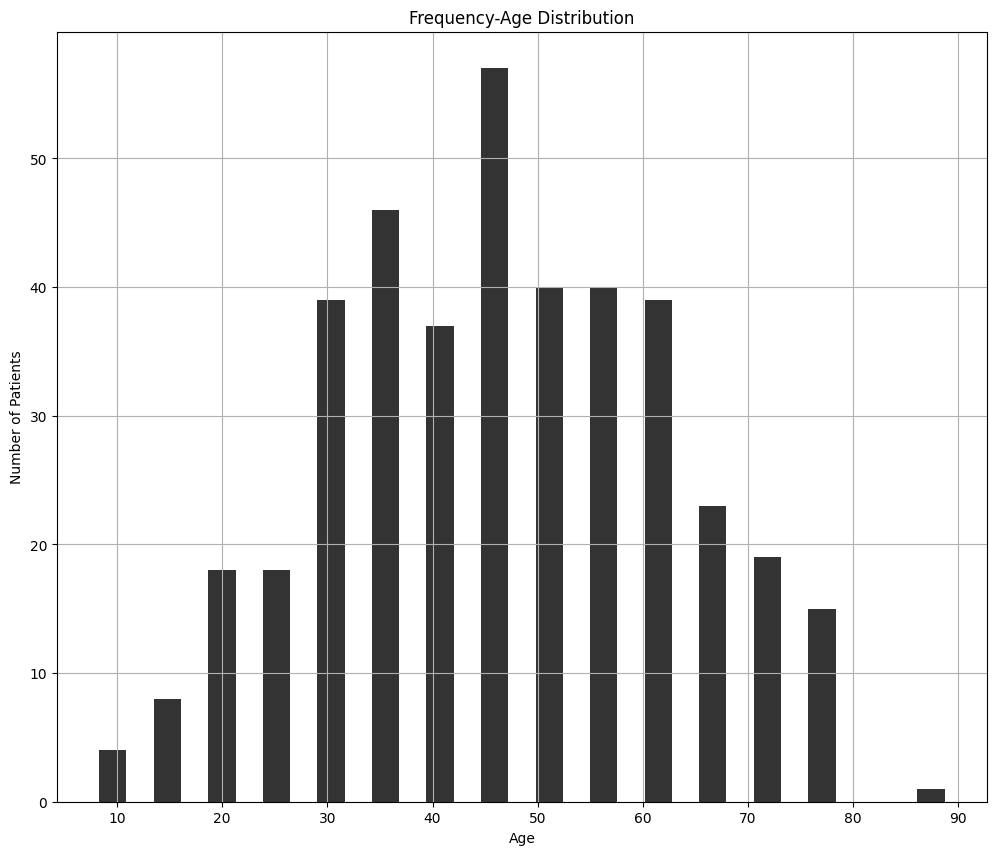

In [24]:
plt.figure(figsize=(12, 10))
plt.hist(data[data['Dataset'] == 1]['Age'], bins = 16, align = 'mid', rwidth = 0.5, color = 'black', alpha = 0.8)
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Frequency-Age Distribution')
plt.grid(True)
plt.savefig('fig1')
plt.show()

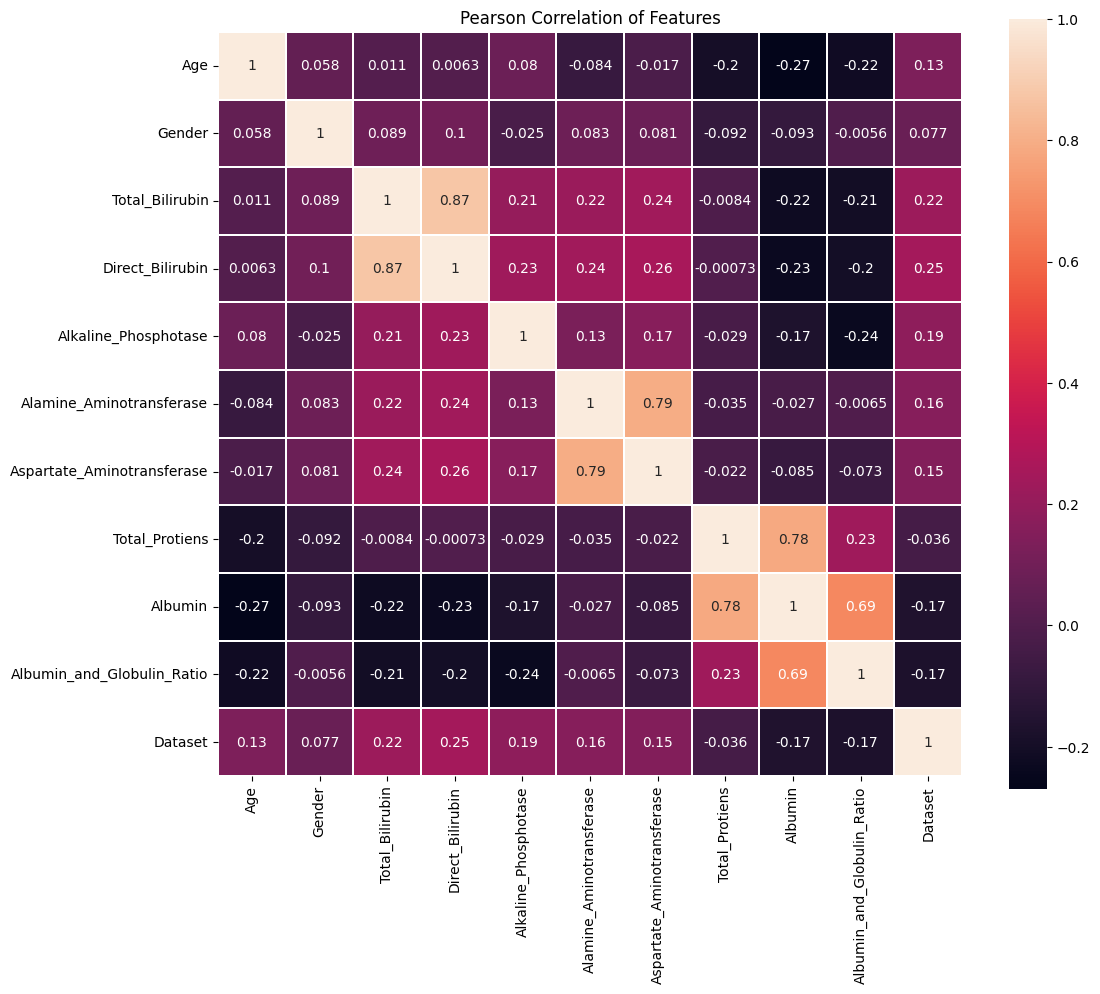

In [25]:
plt.subplots(figsize=(12, 10))
plt.title('Pearson Correlation of Features')
# Draw the heatmap using seaborn
sns.heatmap(data.corr(),linewidths=0.25, vmax=1.0, square=True,annot=True)
plt.savefig('fig2')
plt.show()

## Logistic Regression: Using normal data 

In [26]:

logreg = LogisticRegression(C = 0.1).fit(X_train, y_train)
print("Logistic Regression Classifier on unscaled test data:")
print("Accuracy:", logreg.score(X_test, y_test))
print("Precision:", precision_score(y_test, logreg.predict(X_test)))
print("Recall:", recall_score(y_test, logreg.predict(X_test)))
print("F-1 score:", f1_score(y_test, logreg.predict(X_test)))

Logistic Regression Classifier on unscaled test data:
Accuracy: 0.7183098591549296
Precision: 0.7401574803149606
Recall: 0.9306930693069307
F-1 score: 0.8245614035087719


c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Using scaled data


In [27]:

svc_clf_scaled = SVC(C = 0.1, kernel = 'rbf').fit(X_train_scaled, y_train)
print("SVM Classifier on scaled test data:")
print("Accuracy:", svc_clf_scaled.score(X_test_scaled, y_test))
print("Precision:", precision_score(y_test, svc_clf_scaled.predict(X_test_scaled)))
print("Recall:", recall_score(y_test, svc_clf_scaled.predict(X_test_scaled)))
print("F-1 score:", f1_score(y_test, svc_clf_scaled.predict(X_test_scaled)))

SVM Classifier on scaled test data:
Accuracy: 0.7112676056338029
Precision: 0.7112676056338029
Recall: 1.0
F-1 score: 0.831275720164609


In [28]:

print(X_train.shape)
X_train.columns

(424, 10)


Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio'],
      dtype='object')

In [29]:

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
print("KNN Classifier on unscaled test data:")
print("Accuracy:", knn.score(X_test, y_test))
print("Precision:", precision_score(y_test, knn.predict(X_test)))
print("Recall:", recall_score(y_test, knn.predict(X_test)))
print("F-1 score:", f1_score(y_test, knn.predict(X_test)))



KNN Classifier on unscaled test data:
Accuracy: 0.6619718309859155
Precision: 0.7523809523809524
Recall: 0.7821782178217822
F-1 score: 0.7669902912621359


In [30]:

knn_scaled = KNeighborsClassifier(n_neighbors = 5)
knn_scaled.fit(X_train_scaled, y_train)
print("KNN Classifier on scaled test data:")
print("Accuracy:", knn_scaled.score(X_test_scaled, y_test))
print("Precision:", precision_score(y_test, knn_scaled.predict(X_test_scaled)))
print("Recall:", recall_score(y_test, knn_scaled.predict(X_test_scaled)))
print("F-1 score:", f1_score(y_test, knn_scaled.predict(X_test_scaled)))



KNN Classifier on scaled test data:
Accuracy: 0.6619718309859155
Precision: 0.7431192660550459
Recall: 0.801980198019802
F-1 score: 0.7714285714285715


In [37]:
# depp learning model with hidden layer

# import tensorflow as tf
# from tensorflow import keras

# model = keras.Sequential([
#     keras.layers.Dense(64, input_shape=(10,), activation='relu'),
#     keras.layers.Dense(32, activation='relu'),
#     keras.layers.Dense(1, activation='sigmoid')
# ])


# model.compile(optimizer='adam',
#                 loss='binary_crossentropy',
#                 metrics=['accuracy'])

# model.fit(X_train_scaled, y_train, epochs=100)

#random forest classifier

rf_clf = RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state = 0)
rf_clf.fit(X_train, y_train)
print("Random Forest Classifier on unscaled test data:")
print("Accuracy:", rf_clf.score(X_test, y_test))
print("Precision:", precision_score(y_test, rf_clf.predict(X_test)))
print("Recall:", recall_score(y_test, rf_clf.predict(X_test)))
print("F-1 score:", f1_score(y_test, rf_clf.predict(X_test)))




Random Forest Classifier on unscaled test data:
Accuracy: 0.6830985915492958
Precision: 0.71875
Recall: 0.9108910891089109
F-1 score: 0.8034934497816594


In [38]:

rf_clf_scaled = RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state = 0)
rf_clf_scaled.fit(X_train_scaled, y_train)
print("Random Forest Classifier on scaled test data:")
print("Accuracy:", rf_clf_scaled.score(X_test_scaled, y_test))
print("Precision:", precision_score(y_test, rf_clf_scaled.predict(X_test_scaled)))
print("Recall:", recall_score(y_test, rf_clf_scaled.predict(X_test_scaled)))
print("F-1 score:", f1_score(y_test, rf_clf_scaled.predict(X_test_scaled)))





Random Forest Classifier on scaled test data:
Accuracy: 0.6971830985915493
Precision: 0.7265625
Recall: 0.9207920792079208
F-1 score: 0.8122270742358079


In [39]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(64, input_shape=(10,), activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100


c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7190 - loss: 0.6432   
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6762 - loss: 0.6152 
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7144 - loss: 0.5807 
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7050 - loss: 0.5890 
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7271 - loss: 0.5496 
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7152 - loss: 0.5592 
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7313 - loss: 0.5349 
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7071 - loss: 0.5603 
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6912 - loss: 0.5581 
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7495 - loss: 0.5096 
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7055 - loss: 0.5315 
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy

In [40]:
from sklearn.preprocessing import StandardScaler

# Assuming X_train_scaled and y_train are your training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_scaled)

model = keras.Sequential([
    keras.layers.Dense(64, input_shape=(10,), activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model with a custom optimizer and learning rate
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Fit the model with increased epochs and validation data
history = model.fit(X_train_scaled, y_train, epochs=200, validation_split=0.2)

# Evaluate the model on test data to check the accuracy
X_test_scaled = scaler.transform(X_test)  # Assuming X_test is your test data
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {test_accuracy}")


Epoch 1/200


c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6582 - loss: 0.6435 - val_accuracy: 0.8000 - val_loss: 0.5566
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7182 - loss: 0.5885 - val_accuracy: 0.8000 - val_loss: 0.5135
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6460 - loss: 0.5885 - val_accuracy: 0.8000 - val_loss: 0.4955
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6941 - loss: 0.5450 - val_accuracy: 0.7882 - val_loss: 0.4849
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7142 - loss: 0.5212 - val_accuracy: 0.7647 - val_loss: 0.4836
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7227 - loss: 0.5132 - val_accuracy: 0.7647 - val_loss: 0.4744
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7128 - loss: 0.5147 - val_accuracy: 0.7529 - val_loss: 0.4681
Epoch 8/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7209 - loss: 0.5195 - val_accuracy: 0.7412 - val_loss: 0.

c:\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [88]:




import pickle
pickle.dump(logreg, open('liver-disease.sav', 'wb'))










In [89]:
load_model = pickle.load(open(filename, 'rb'))
result = load_model.score(X_test, y_test)
print(result)

0.9859154929577465


In [90]:
load_model = pickle.load(open(filename, 'rb'))
result = load_model.score(X_test, y_test)
print(result)


0.9859154929577465


In [91]:
# give column name laod_model

load_model = pickle.load(open(filename
, 'rb'))
result = load_model.score(X_test, y_test)

print(result)

# give column name laod_model

load_model = pickle.load(open(filename
, 'rb'))

result = load_model.score(X_test, y_test)

0.9859154929577465
